In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from scipy.stats import norm, kde, kstest
from scipy.stats import poisson

from numpy import inf
import math
from sklearn.cluster import KMeans


In [3]:
import os
import glob
import nltk
import pandas as pd
import numpy as np

In [5]:
GCF20 = pd.read_csv(r"C:\unnati\datascience\data\FY2020\structured\emotion\GuilfordCountyEmotionDataFY20.csv")    # General Fund Summary 2008 #
GCF20.drop(['Unnamed: 0'], axis=1,inplace=True)

DC20 = pd.read_csv(r"C:\unnati\datascience\data\FY2020\structured\emotion\DurhamCityEmotionDataFY20.csv")    # General Fund Summary 2008 #
DC20.drop(['Unnamed: 0'], axis=1,inplace=True)

DCT20 = pd.read_csv(r"C:\unnati\datascience\data\FY2020\structured\emotion\DurhamCountyEmotionDataFY20.csv")    # General Fund Summary 2008 #
DCT20.drop(['Unnamed: 0'], axis=1,inplace=True)

CC20 = pd.read_csv(r"C:\unnati\datascience\data\FY2020\structured\emotion\CharlotteCityEmotionDataFY20.csv")    # General Fund Summary 2008 #
CC20.drop(['Unnamed: 0'], axis=1,inplace=True)

RC20 = pd.read_csv(r"C:\unnati\datascience\data\FY2020\structured\emotion\RaleighCityEmotionDataFY20.csv")    # General Fund Summary 2008 #
RC20.drop(['Unnamed: 0'], axis=1,inplace=True)



In [6]:
df =  pd.concat([GCF20,DC20,DCT20,CC20,RC20], ignore_index=True)
df.head()

,page_number,word,sent_count,sentiment,category
0,457,Fire,46,Fear,Emotion
1,306,Fire,44,Fear,Emotion
2,307,Fire,36,Fear,Emotion
3,399,County,30,Trust,Emotion
4,449,Fire,29,Fear,Emotion


In [7]:
df.sentiment = df.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [8]:
df_neg = df.loc[df.sentiment =='0']

In [9]:
rslt_df1 = df_neg[df_neg['sent_count'] > 5]

In [10]:
df_neg.head()

,page_number,word,sent_count,sentiment,category
8,99,Tax,21,0,Sentiment
9,99,Tax,21,0,Emotion
14,299,Debt,18,0,Sentiment
15,299,Debt,18,0,Emotion
16,92,Debt,17,0,Sentiment


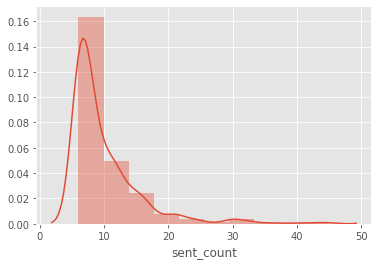

In [11]:
sns.distplot(rslt_df1.sent_count,bins = 10)

In [12]:
df_pos= df[df['sentiment'].isin(['2'])]

In [13]:
rslt_df = df_pos[df_pos['sent_count'] > 5]

In [14]:
rslt_df.head()

,page_number,word,sent_count,sentiment,category
3,399,County,30,2,Emotion
6,36,Budget,22,2,Emotion
7,35,County,21,2,Emotion
10,29,Budget,20,2,Emotion
11,34,Budget,20,2,Emotion


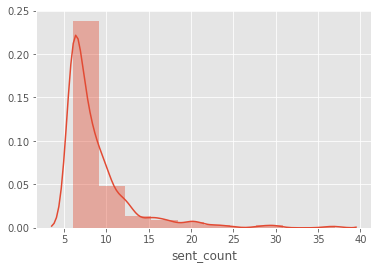

In [15]:
sns.distplot(rslt_df.sent_count,bins = 10)

In [16]:
data = np.array(rslt_df.sent_count)   
   
print(kstest(data,'poisson', args=(1,), alternative = 'greater',N=1000))

KstestResult(statistic=0.0, pvalue=1.0)
